### IMPORTS

In [104]:
import sys
import os
sys.executable

'c:\\Users\\V61XNRQ\\AppData\\Local\\Programs\\Python\\Python311\\python.exe'

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [106]:
SAVE_PATH = "../saves/"

In [107]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

In [108]:
savefiles = [file for file in os.listdir(SAVE_PATH) if file != "pareto.csv"] 
savefiles

['saves_1710424156961.csv',
 'saves_1710424454746.csv',
 'saves_1710424515049.csv',
 'saves_1710424637019.csv',
 'saves_1710424916129.csv',
 'saves_1710429089587.csv',
 'saves_1710429514728.csv',
 'saves_1710429727788.csv',
 'saves_1710429865873.csv',
 'saves_1710429985239.csv',
 'saves_1710430130919.csv',
 'saves_1710430150347.csv',
 'saves_1710430307672.csv',
 'saves_1710430871920.csv',
 'saves_1710431208782.csv',
 'saves_1710433005888.csv',
 'saves_1710433038829.csv',
 'saves_1710433067539.csv',
 'saves_1710433104086.csv',
 'saves_1710433145786.csv',
 'saves_1710433231572.csv',
 'saves_1710433284422.csv',
 'saves_1710433317750.csv',
 'saves_1710433333342.csv',
 'saves_1710433396034.csv',
 'saves_1710433430620.csv',
 'saves_1710433540895.csv',
 'saves_1710433601737.csv',
 'saves_1710433642142.csv',
 'saves_1710433666142.csv',
 'saves_1710433698580.csv',
 'saves_1710433876094.csv']

### VISUALIZATION

In [109]:
pareto = pd.read_csv(SAVE_PATH+'pareto.csv', sep=';')
pareto

,utilA,utilB,utilSum,contract,pareto
0,2243,8253,10496,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
1,2266,8242,10508,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
2,2261,8252,10513,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
3,2273,8240,10513,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
4,2233,8283,10516,"[136,67,193,48,10,1,91,129,8,84,122,73,174,135...",True
...,...,...,...,...,...
66,6924,7901,14825,"[198,174,190,32,189,87,6,61,38,163,199,49,12,1...",True
67,6938,7900,14838,"[198,174,190,32,189,87,6,61,38,163,199,49,12,1...",True
68,6995,7899,14894,"[198,174,190,32,189,87,6,61,38,163,199,49,12,1...",True
69,7018,7894,14912,"[198,174,190,32,189,87,6,61,38,163,199,49,12,1...",True


In [110]:
for savefile in savefiles:
    contracts = pd.read_csv(SAVE_PATH + savefile, sep=';')
    if "pareto" not in contracts.columns:
        contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
        contracts = contracts.sort_values(by="utilSum", ascending=False).drop_duplicates()
        contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
    pareto = pd.concat([pareto, contracts[contracts["pareto"]]])
pareto = pareto.sort_values(by="utilSum", ascending=False).drop_duplicates()
pareto["pareto"] = get_pareto(pareto[["utilA","utilB"]])
pareto = pareto[pareto["pareto"]].sort_values(by="utilSum", ascending=True)
pareto.to_csv(SAVE_PATH+'pareto.csv', sep=';', index=False)
pareto

,utilA,utilB,utilSum,contract,pareto
99998,2243,8253,10496,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
1471,2231,8265,10496,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
0,2243,8253,10496,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
1124,2242,8259,10501,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
2206,2253,8251,10504,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
...,...,...,...,...,...
223,7832,7737,15569,"[198,174,23,32,132,87,6,88,38,163,199,78,12,18...",True
206,7950,7682,15632,"[198,174,23,69,182,87,6,88,38,163,199,78,12,18...",True
198,8026,7638,15664,"[198,174,23,32,182,87,6,88,38,163,75,86,12,185...",True
195,7945,7724,15669,"[198,174,23,32,132,87,6,88,38,163,199,78,12,18...",True


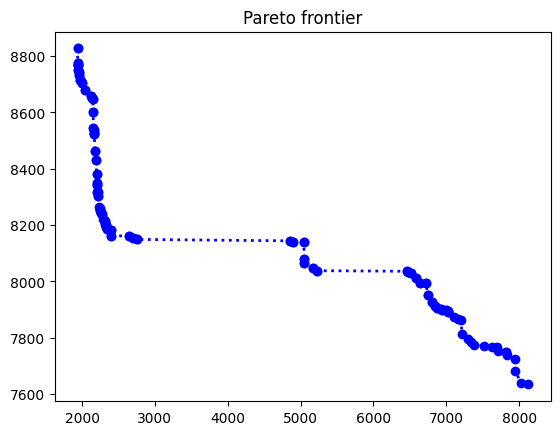

In [111]:
pareto = pareto.sort_values(by="utilA", ascending=True)
plt.title("Pareto frontier")
plt.plot(pareto["utilA"], pareto["utilB"], color='blue', linestyle=':', linewidth=2)
plt.scatter(pareto["utilA"], pareto["utilB"], color='blue')

In [112]:
pareto.shape

(150, 5)